In [57]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca CSV dengan delimiter yang benar
df = pd.read_csv("BMRI.csv")  # Menyesuaikan delimiter

# Menampilkan hasil
print(df)  # Cek apakah kolom sudah benar

# Konversi kolom 'Date' menjadi format datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df.set_index('Date', inplace=True)


            Date  Close  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0       2/1/2020   7750         NaN         NaN         NaN         NaN   
1       3/1/2020   7725         NaN         NaN         NaN         NaN   
2       6/1/2020   7600         NaN         NaN         NaN         NaN   
3       7/1/2020   7600         NaN         NaN         NaN         NaN   
4       8/1/2020   7500         NaN         NaN         NaN         NaN   
...          ...    ...         ...         ...         ...         ...   
1167  25/10/2024   7050         NaN         NaN         NaN         NaN   
1168  28/10/2024   6825         NaN         NaN         NaN         NaN   
1169  29/10/2024   6825         NaN         NaN         NaN         NaN   
1170  30/10/2024   6750         NaN         NaN         NaN         NaN   
1171  31/10/2024   6700         NaN         NaN         NaN         NaN   

      Unnamed: 6  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4   

In [59]:
# Memeriksa data untuk nilai null
print("\nCek Nilai Null:")
print(df.isnull().sum())


Cek Nilai Null:
Close            0
Unnamed: 2    1172
Unnamed: 3    1172
Unnamed: 4    1172
Unnamed: 5    1172
Unnamed: 6    1172
dtype: int64


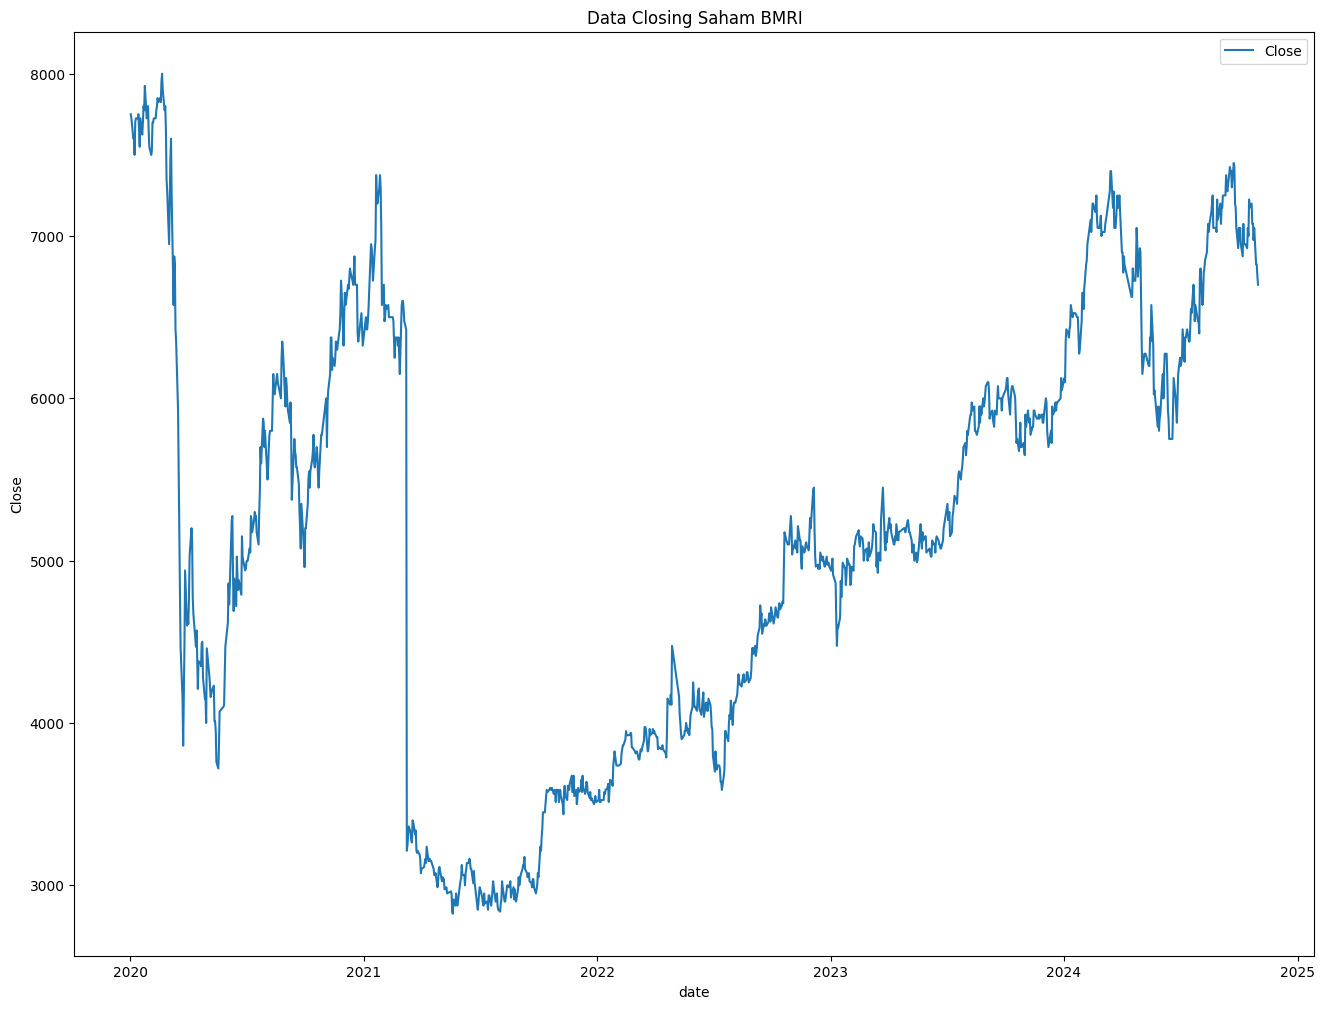

In [60]:
# Visualisasi data historis
plt.figure(figsize=(16, 12))
plt.plot(df['Close'], label='Close')
plt.title('Data Closing Saham BMRI')
plt.xlabel('date')
plt.ylabel('Close')
plt.legend()
plt.show()

In [61]:
# Menormalisasi data dengan MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(df[['Close']].values)
print("\nData Normalisasi:")
print(data_scaled)


Data Normalisasi:
[[0.95169082]
 [0.9468599 ]
 [0.92270531]
 ...
 [0.77294686]
 [0.75845411]
 [0.74879227]]


In [62]:
# Membagi data menjadi latih dan uji
training_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:training_size], data_scaled[training_size:]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (937, 1)
test_data:  (235, 1)


In [63]:
# Fungsi untuk membuat dataset time-series
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        dataX.append(dataset[i:(i + time_step), 0]) # Ambil time_step data sebagai input
        dataY.append(dataset[i + time_step, 0]) # Data berikutnya sebagai prediksi
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)
print("Shape y_train:", y_train.shape)
print("Shape y_test:", y_test.shape)

Shape X_train: (877, 60)
Shape X_test: (175, 60)
Shape y_train: (877,)
Shape y_test: (175,)


In [64]:
# Mengubah bentuk input untuk LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print("Shape X_train:", X_train.shape)
print("Shape X_test:", X_test.shape)

Shape X_train: (877, 60, 1)
Shape X_test: (175, 60, 1)


In [65]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import backend as K
import numpy as np
import tensorflow as tf
import random
import os

# 1. Set seed untuk NumPy
np.random.seed(42)

# 2. Set seed untuk Python random
random.seed(42)

# 3. Set seed untuk TensorFlow
tf.random.set_seed(42)

# 4. Memastikan hasil tetap sama saat dijalankan ulang
os.environ['PYTHONHASHSEED'] = '42'

# 5. Konfigurasi deterministik untuk TensorFlow (opsional tapi bisa membantu)
tf.config.experimental.enable_op_determinism()

# 2. Membuat dan Melatih Model LSTM

model = Sequential([
    LSTM(50, activation='tanh', recurrent_activation="sigmoid", input_shape=(time_step, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=200,
    batch_size=16,
    callbacks=[early_stopping],
    verbose=1
)

Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



55/55 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step - loss: 0.0605 - val_loss: 0.0086
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 0.0034 - val_loss: 0.0020
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0026 - val_loss: 0.0019
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0016 - val_loss: 0.0018
Epoch 10/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0015 - val_loss: 0.0018
Epoch 11/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0014 - val_loss: 0.0017
Epoch 12/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0

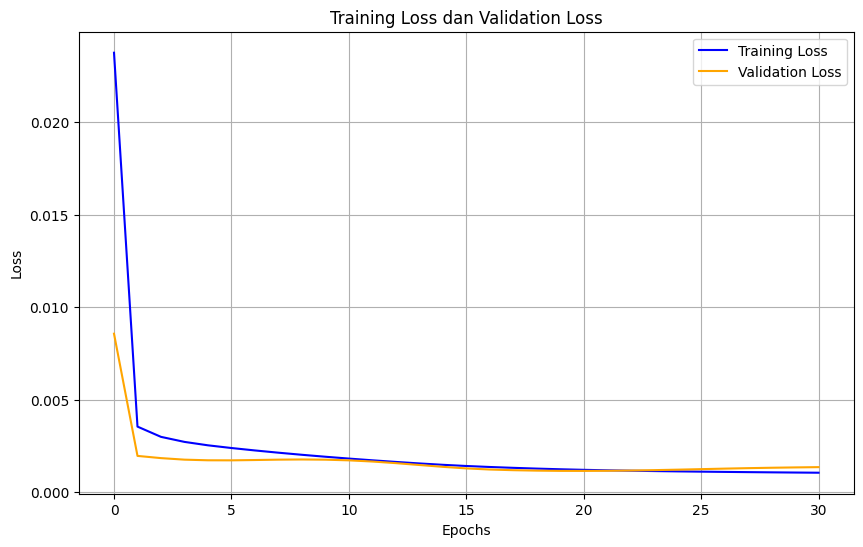

In [66]:
# Visualisasi Training Loss dan Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title('Training Loss dan Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

In [67]:
# 3. Ambil Bobot Awal
lstm_weights = model.layers[0].get_weights()
W, U, b = lstm_weights[0], lstm_weights[1], lstm_weights[2]

# 4. Pecah Bobot ke Setiap Gate
def split_weights(W, U, b):
    W_i, W_f, W_c, W_o = np.split(W, 4, axis=1)  # Bobot input ke gate
    U_i, U_f, U_c, U_o = np.split(U, 4, axis=1)  # Bobot hidden ke gate
    b_i, b_f, b_c, b_o = np.split(b, 4)  # Bias setiap gate
    return (W_i, U_i, b_i), (W_f, U_f, b_f), (W_c, U_c, b_c), (W_o, U_o, b_o)

(Wi, Ui, bi), (Wf, Uf, bf), (Wc, Uc, bc), (Wo, Uo, bo) = split_weights(W, U, b)

# 5. Simpan Bobot ke dalam Excel
target_file = "LSTM_Weights.xlsx"
with pd.ExcelWriter(target_file) as writer:
    pd.DataFrame(Wi).to_excel(writer, sheet_name="Wi")
    pd.DataFrame(Ui).to_excel(writer, sheet_name="Ui")
    pd.DataFrame(bi).to_excel(writer, sheet_name="bi")

    pd.DataFrame(Wf).to_excel(writer, sheet_name="Wf")
    pd.DataFrame(Uf).to_excel(writer, sheet_name="Uf")
    pd.DataFrame(bf).to_excel(writer, sheet_name="bf")

    pd.DataFrame(Wc).to_excel(writer, sheet_name="Wc")
    pd.DataFrame(Uc).to_excel(writer, sheet_name="Uc")
    pd.DataFrame(bc).to_excel(writer, sheet_name="bc")

    pd.DataFrame(Wo).to_excel(writer, sheet_name="Wo")
    pd.DataFrame(Uo).to_excel(writer, sheet_name="Uo")
    pd.DataFrame(bo).to_excel(writer, sheet_name="bo")

print(f"\n== File {target_file} telah disimpan! ==")



== File LSTM_Weights.xlsx telah disimpan! ==


In [68]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 1. Fungsi Sigmoid dan Tanh untuk Perhitungan Manual
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# 2. Hitung Forward Pass

def lstm_forward(X, Wi, Ui, bi, Wf, Uf, bf, Wo, Uo, bo, Wc, Uc, bc):
    batch_size, time_steps, input_dim = X.shape
    hidden_dim = Ui.shape[0]  # Jumlah unit LSTM

    h_t = np.zeros((batch_size, hidden_dim))  # Hidden state awal
    c_t = np.zeros((batch_size, hidden_dim))  # Cell state awal

    for t in range(time_steps):
        x_t = X[:, t, :]  # Ambil input per time step

        # Hitung setiap gate
        i_t = sigmoid(np.dot(x_t, Wi) + np.dot(h_t, Ui) + bi)  # Input gate
        f_t = sigmoid(np.dot(x_t, Wf) + np.dot(h_t, Uf) + bf)  # Forget gate
        o_t = sigmoid(np.dot(x_t, Wo) + np.dot(h_t, Uo) + bo)  # Output gate
        c_tilde = tanh(np.dot(x_t, Wc) + np.dot(h_t, Uc) + bc)  # Candidate cell state

        # Update cell state dan hidden state
        c_t = f_t * c_t + i_t * c_tilde
        h_t = o_t * tanh(c_t)

    return i_t, f_t, o_t, c_tilde, h_t, c_t

# Ambil batch pertama
batch_sample = X_train[:16]

# Hitung forward pass
i_t, f_t, o_t, c_tilde, h_t, c_t = lstm_forward(
    batch_sample, Wi, Ui, bi, Wf, Uf, bf, Wo, Uo, bo, Wc, Uc, bc
)

# Hitung Output dari Dense Layer
dense_weights = model.layers[1].get_weights()
Wd, bd = dense_weights[0], dense_weights[1]
dense_output = np.dot(h_t, Wd) + bd

# Simpan Hasil Forward Pass ke dalam Excel
target_file = "LSTM_Forward_Pass.xlsx"
with pd.ExcelWriter(target_file) as writer:
    pd.DataFrame(i_t).to_excel(writer, sheet_name="Input_Gate")
    pd.DataFrame(f_t).to_excel(writer, sheet_name="Forget_Gate")
    pd.DataFrame(o_t).to_excel(writer, sheet_name="Output_Gate")
    pd.DataFrame(c_tilde).to_excel(writer, sheet_name="Cell_Candidate")
    pd.DataFrame(h_t).to_excel(writer, sheet_name="Hidden_State")
    pd.DataFrame(c_t).to_excel(writer, sheet_name="Cell_State")
    pd.DataFrame(dense_output).to_excel(writer, sheet_name="Dense_Output")

print(f"\n== File {target_file} telah disimpan! ==")



== File LSTM_Forward_Pass.xlsx telah disimpan! ==


In [69]:
import numpy as np
import tensorflow as tf
import pandas as pd

# Pastikan model sudah dilatih
assert 'model' in globals(), "Model belum dilatih! Jalankan pelatihan terlebih dahulu."

# 1. Definisikan fungsi loss
loss_fn = tf.keras.losses.MeanSquaredError()

# 2. Gunakan GradientTape untuk menghitung gradien
def compute_gradients(model, X_batch, y_batch):
    with tf.GradientTape() as tape:
        predictions = model(X_batch, training=True)
        loss = loss_fn(y_batch, predictions)
    gradients = tape.gradient(loss, model.trainable_variables)
    return gradients

# 3. Ambil batch pertama untuk perhitungan gradien
X_batch, y_batch = X_train[:16], y_train[:16]
gradients = compute_gradients(model, X_batch, y_batch)

# 4. Pecah gradien ke setiap gate
W_grad, U_grad, b_grad = gradients[0].numpy(), gradients[1].numpy(), gradients[2].numpy()

def split_gradients(W, U, b):
    dWi, dWf, dWc, dWo = np.split(W, 4, axis=1)
    dUi, dUf, dUc, dUo = np.split(U, 4, axis=1)
    dbi, dbf, dbc, dbo = np.split(b, 4)
    return (dWi, dUi, dbi), (dWf, dUf, dbf), (dWc, dUc, dbc), (dWo, dUo, dbo)

(dWi, dUi, dbi), (dWf, dUf, dbf), (dWc, dUc, dbc), (dWo, dUo, dbo) = split_gradients(W_grad, U_grad, b_grad)

# 5. Simpan hasil gradien ke dalam file Excel
file_name = "LSTM_Gradients.xlsx"
with pd.ExcelWriter(file_name) as writer:
    pd.DataFrame(dWi).to_excel(writer, sheet_name="dWi")
    pd.DataFrame(dUi).to_excel(writer, sheet_name="dUi")
    pd.DataFrame(dbi).to_excel(writer, sheet_name="dbi")

    pd.DataFrame(dWf).to_excel(writer, sheet_name="dWf")
    pd.DataFrame(dUf).to_excel(writer, sheet_name="dUf")
    pd.DataFrame(dbf).to_excel(writer, sheet_name="dbf")

    pd.DataFrame(dWc).to_excel(writer, sheet_name="dWc")
    pd.DataFrame(dUc).to_excel(writer, sheet_name="dUc")
    pd.DataFrame(dbc).to_excel(writer, sheet_name="dbc")

    pd.DataFrame(dWo).to_excel(writer, sheet_name="dWo")
    pd.DataFrame(dUo).to_excel(writer, sheet_name="dUo")
    pd.DataFrame(dbo).to_excel(writer, sheet_name="dbo")

print(f"\n== File {file_name} telah disimpan! ==")



== File LSTM_Gradients.xlsx telah disimpan! ==


In [70]:
import tensorflow as tf
import numpy as np
import pandas as pd

# Adam Optimizer Parameters
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8

# Inisialisasi m dan v untuk Adam
m_W, v_W = np.zeros_like(W), np.zeros_like(W)
m_U, v_U = np.zeros_like(U), np.zeros_like(U)
m_b, v_b = np.zeros_like(b), np.zeros_like(b)

t = 1  # Iterasi pertama Adam

def adam_update(param, grad, m, v, t, lr=learning_rate, beta1=beta1, beta2=beta2, eps=epsilon):
    """Fungsi untuk memperbarui parameter menggunakan Adam optimizer"""
    m = beta1 * m + (1 - beta1) * grad
    v = beta2 * v + (1 - beta2) * (grad ** 2)
    m_hat = m / (1 - beta1 ** t)
    v_hat = v / (1 - beta2 ** t)
    param -= lr * m_hat / (np.sqrt(v_hat) + eps)
    return param, m, v

# Update bobot dan bias untuk setiap gate
W_new, m_W, v_W = adam_update(W, W_grad, m_W, v_W, t)
U_new, m_U, v_U = adam_update(U, U_grad, m_U, v_U, t)
b_new, m_b, v_b = adam_update(b, b_grad, m_b, v_b, t)

# Pecah bobot baru ke dalam setiap gate
(Wi_new, Ui_new, bi_new), (Wf_new, Uf_new, bf_new), (Wc_new, Uc_new, bc_new), (Wo_new, Uo_new, bo_new) = split_weights(W_new, U_new, b_new)

# Simpan bobot baru ke dalam file Excel
updated_weights_file = "LSTM_Updated_Weights.xlsx"
with pd.ExcelWriter(updated_weights_file) as writer:
    pd.DataFrame(Wi_new).to_excel(writer, sheet_name="Wi_New")
    pd.DataFrame(Ui_new).to_excel(writer, sheet_name="Ui_New")
    pd.DataFrame(bi_new).to_excel(writer, sheet_name="bi_New")

    pd.DataFrame(Wf_new).to_excel(writer, sheet_name="Wf_New")
    pd.DataFrame(Uf_new).to_excel(writer, sheet_name="Uf_New")
    pd.DataFrame(bf_new).to_excel(writer, sheet_name="bf_New")

    pd.DataFrame(Wc_new).to_excel(writer, sheet_name="Wc_New")
    pd.DataFrame(Uc_new).to_excel(writer, sheet_name="Uc_New")
    pd.DataFrame(bc_new).to_excel(writer, sheet_name="bc_New")

    pd.DataFrame(Wo_new).to_excel(writer, sheet_name="Wo_New")
    pd.DataFrame(Uo_new).to_excel(writer, sheet_name="Uo_New")
    pd.DataFrame(bo_new).to_excel(writer, sheet_name="bo_New")

print(f"\n== Bobot dan bias baru telah disimpan di {updated_weights_file}! ==")



== Bobot dan bias baru telah disimpan di LSTM_Updated_Weights.xlsx! ==


In [71]:
# 3. Evaluasi Model
# Membuat prediksi
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Mengembalikan data ke skala aslinya
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_original = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Menghitung metrik evaluasi untuk data latih dan uji
train_rmse = math.sqrt(mean_squared_error(y_train_original, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_original, test_predict))
train_mse = mean_squared_error(y_train_original, train_predict)
test_mse = mean_squared_error(y_test_original, test_predict)
train_mape = np.mean(np.abs((y_train_original - train_predict) / y_train_original)) * 100
test_mape = np.mean(np.abs((y_test_original - test_predict) / y_test_original)) * 100

print("\nEvaluasi Model:")
print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")
print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Train MAPE: {train_mape}%")
print(f"Test MAPE: {test_mape}%")

28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

Evaluasi Model:
Train RMSE: 171.0045909119287
Test RMSE: 176.20697020034004
Train MSE: 29242.570112956088
Test MSE: 31048.89634718352
Train MAPE: 2.0095573105734896%
Test MAPE: 2.2045813477596843%


In [72]:
# Mengambil bobot dari layer LSTM
lstm_layer = model.layers[0]  # Lapisan LSTM
weights = lstm_layer.get_weights()


# Memisahkan bobot menjadi Kernel (W), Recurrent weights (U), dan Bias (b)
W = weights[0]  # Kernel weights (input to gates)
U = weights[1]  # Recurrent weights (hidden state to gates)
b = weights[2]  # Bias

# Menampilkan ukuran setiap bobot
print("Shape of W (bobot input):", W.shape)
print("Shape of U (Bobot hidden state):", U.shape)
print("Shape of b (Bias):", b.shape)

# Memisahkan bobot untuk setiap gate
units = lstm_layer.units  # Jumlah unit (neurons) dalam LSTM

W_f, W_i, W_c, W_o = W[:, :units], W[:, units:2*units], W[:, 2*units:3*units], W[:, 3*units:]
U_f, U_i, U_c, U_o = U[:, :units], U[:, units:2*units], U[:, 2*units:3*units], U[:, 3*units:]
b_f, b_i, b_c, b_o = b[:units], b[units:2*units], b[2*units:3*units], b[3*units:]


Shape of W (bobot input): (1, 200)
Shape of U (Bobot hidden state): (50, 200)
Shape of b (Bias): (200,)


In [73]:
# Menampilkan bobot untuk Forget Gate
print("W_f (Bobot Input untuk Forget Gate):\n", W_f)
print("U_f (Bobot hidden state untuk Forget Gate):\n", U_f)
print("b_f (Bias untuk Forget Gate):\n", b_f)

print("Shape of W_f:", W_f.shape)
print("Shape of U_f:", U_f.shape)
print("Shape of b_f:", b_f.shape)

W_f (Bobot Input untuk Forget Gate):
 [[ 0.16666397  0.1159428  -0.10597426  0.16583145 -0.18813966  0.06511942
   0.13956891 -0.12725443  0.06762186  0.07770324 -0.07757431  0.02225612
   0.1977406  -0.00659492  0.0084585   0.15833236 -0.18988998 -0.09745017
  -0.00314538  0.22956452 -0.08860523  0.17460038  0.13692488  0.00732632
   0.21174644 -0.10831296  0.03365611  0.07061459  0.08109832 -0.09941649
  -0.07470608  0.19527769 -0.11171476  0.03623408 -0.1071784  -0.172202
   0.14117038 -0.02381405  0.09054933  0.06830978 -0.17783186  0.21017547
  -0.03233982  0.02043145  0.1939877   0.06496239  0.04763997 -0.10652157
  -0.02613594  0.14179796]]
U_f (Bobot hidden state untuk Forget Gate):
 [[ 0.03440901 -0.0381439   0.02846435 ... -0.03065653 -0.07408237
  -0.01361687]
 [ 0.05117435  0.03142712 -0.06488191 ... -0.15281     0.02763839
   0.20347306]
 [-0.05333384 -0.03171426 -0.00628549 ... -0.01886236 -0.06543143
  -0.03039896]
 ...
 [ 0.01042346 -0.0551948   0.0247571  ...  0.139125

In [74]:
# Menampilkan bobot untuk Input Gate
print("W_i (Bobot Input untuk Input Gate):\n", W_i)
print("U_i (Bobot hidden state untuk Input Gate):\n", U_i)
print("b_i (Bias untuk Input Gate):\n", b_i)
print("Shape of W_i:", W_i.shape)
print("Shape of U_i:", U_i.shape)
print("Shape of b_i:", b_i.shape)

W_i (Bobot Input untuk Input Gate):
 [[ 6.31715581e-02  5.00826240e-02 -2.13492274e-01 -1.24513559e-01
   5.67134842e-02  1.32225886e-01 -4.22875397e-02 -8.20063129e-02
  -1.20178238e-01 -1.43320963e-01  9.59067345e-02  1.47850573e-01
  -1.28032444e-02  7.93164223e-02 -5.42528220e-02  1.14321202e-01
  -8.43535215e-02 -2.40969155e-02  1.17424093e-01  1.40667662e-01
   1.31972685e-01  1.83447748e-01  1.21824056e-01 -2.88059954e-02
   1.48844168e-01 -1.31989762e-01  1.96646690e-01  1.08854681e-01
   6.24103956e-02 -1.15426041e-01 -8.26119110e-02  1.86069697e-01
  -1.32645667e-01 -5.82983438e-03 -1.14929847e-01 -1.53041527e-01
   1.71320930e-01  2.02650860e-01  6.47642612e-02  3.01940069e-02
   2.30707548e-04  2.44197980e-01  1.24660702e-02 -8.71307701e-02
   1.60220802e-01  4.52165157e-02  1.34318441e-01  1.08017884e-01
   6.33125156e-02 -1.24709927e-01]]
U_i (Bobot hidden state untuk Input Gate):
 [[ 0.05210719  0.07422303 -0.17478988 ... -0.01676139  0.04722047
  -0.09477104]
 [-0.12186

In [75]:
# Menampilkan bobot untuk Cell State
print("W_c (Bobot Input untuk Cell State):\n", W_c)
print("U_c (Bobot hidden state untuk Cell State):\n", U_c)
print("b_c (Bias untuk Cell State):\n", b_c)
print("Shape of W_c:", W_c.shape)
print("Shape of U_c:", U_c.shape)
print("Shape of b_c:", b_c.shape)

W_c (Bobot Input untuk Cell State):
 [[ 0.21886438  0.187457    0.03879469 -0.07896476 -0.0673464   0.12402114
  -0.10101134  0.00332733  0.08479998  0.02582669 -0.15907234  0.1172365
  -0.06250245  0.14710006  0.02911448 -0.1278556   0.11701111 -0.14881396
  -0.0797121  -0.40495053  0.05213278 -0.20521481 -0.11245855  0.22646171
   0.0710264  -0.13161907  0.17541206 -0.18757287  0.09803179 -0.14865378
   0.13665701 -0.10972668 -0.01425794 -0.02090572 -0.03694998 -0.10402279
  -0.0450834   0.00233985  0.19281979 -0.11252414 -0.1501333  -0.21492226
   0.06344645  0.18256849  0.15755436  0.08028799 -0.0343296   0.13702232
   0.005305   -0.13406873]]
U_c (Bobot hidden state untuk Cell State):
 [[-0.1627034   0.02504664  0.02377427 ... -0.04856811  0.10897882
   0.00494095]
 [-0.01902387  0.00937209  0.1451998  ...  0.05934266 -0.05302043
  -0.02056083]
 [ 0.03104244  0.09415355 -0.06826802 ...  0.02724626  0.06100845
  -0.01161991]
 ...
 [ 0.13583504 -0.06203266  0.12034454 ...  0.0271657

In [76]:
# Menampilkan bobot untuk Output Gate
print("W_o (Bobot Input untuk Output Gate):\n", W_o)
print("U_o (Bobot hidden state untuk Output Gate):\n", U_o)
print("b_o (Bias untuk Output Gate):\n", b_o)
print("Shape of W_o:", W_o.shape)
print("Shape of U_o:", U_o.shape)
print("Shape of b_o:", b_o.shape)

W_o (Bobot Input untuk Output Gate):
 [[ 0.1015799   0.30383596 -0.1855791  -0.01583202 -0.20218135 -0.17488953
   0.0860501  -0.11881933  0.190842    0.16796412  0.12476184  0.13468497
  -0.07308882  0.14337607  0.1994853  -0.05564762  0.09502477 -0.07226863
   0.11119945  0.3091224   0.06263202  0.15460277 -0.01579496  0.15324956
   0.08367036  0.22353737  0.09803371  0.00603918  0.21750534 -0.15871894
   0.03549755  0.22872943 -0.10805044 -0.0292333  -0.12358001 -0.09283531
   0.13168381 -0.02278651 -0.00453562 -0.0286064   0.00608259  0.16401272
   0.04882057  0.21048057  0.2721378   0.3289362   0.03293137 -0.02691144
   0.28092486  0.18604994]]
U_o (Bobot hidden state untuk Output Gate):
 [[ 0.01413973  0.12889005  0.09740815 ... -0.06522537 -0.02266731
   0.08793899]
 [ 0.10432408  0.03359447 -0.10041782 ... -0.02917244 -0.04582902
  -0.01080411]
 [-0.04403636  0.00503397  0.007619   ... -0.0311466  -0.16934206
  -0.12719955]
 ...
 [ 0.02448532 -0.01897431 -0.05119809 ... -0.1412

In [77]:
# Menyimpan semua bobot dan bias ke dalam satu file Excel
with pd.ExcelWriter("LSTM_Weights_Biases.xlsx", engine="openpyxl") as writer:
    pd.DataFrame(W_f).to_excel(writer, sheet_name="W_f (Forget Gate)", index=False)
    pd.DataFrame(W_i).to_excel(writer, sheet_name="W_i (Input Gate)", index=False)
    pd.DataFrame(W_c).to_excel(writer, sheet_name="W_c (Candidate Gate)", index=False)
    pd.DataFrame(W_o).to_excel(writer, sheet_name="W_o (Output Gate)", index=False)

    pd.DataFrame(U_f).to_excel(writer, sheet_name="U_f (Forget Gate)", index=False)
    pd.DataFrame(U_i).to_excel(writer, sheet_name="U_i (Input Gate)", index=False)
    pd.DataFrame(U_c).to_excel(writer, sheet_name="U_c (Candidate Gate)", index=False)
    pd.DataFrame(U_o).to_excel(writer, sheet_name="U_o (Output Gate)", index=False)

    pd.DataFrame(b_f).to_excel(writer, sheet_name="b_f (Forget Gate)", index=False)
    pd.DataFrame(b_i).to_excel(writer, sheet_name="b_i (Input Gate)", index=False)
    pd.DataFrame(b_c).to_excel(writer, sheet_name="b_c (Candidate Gate)", index=False)
    pd.DataFrame(b_o).to_excel(writer, sheet_name="b_o (Output Gate)", index=False)

print("Semua bobot dan bias berhasil disimpan dalam satu file Excel!")

Semua bobot dan bias berhasil disimpan dalam satu file Excel!


In [78]:
# === Ambil Bobot & Bias Dense Layer ===
dense_weights, dense_bias = model.layers[1].get_weights()

print("W_dense: ", dense_weights)
print("b_dense: ", dense_bias)

W_dense:  [[ 0.27965227]
 [ 0.14460357]
 [ 0.03450454]
 [ 0.06856265]
 [ 0.18930788]
 [ 0.20760714]
 [ 0.21072324]
 [ 0.24944003]
 [-0.1570343 ]
 [ 0.11352371]
 [-0.3351666 ]
 [ 0.19547245]
 [-0.10037091]
 [-0.04437929]
 [ 0.01604097]
 [-0.38443843]
 [-0.13255738]
 [-0.07136484]
 [ 0.22647887]
 [-0.3389549 ]
 [ 0.06482123]
 [-0.1036246 ]
 [ 0.2609555 ]
 [ 0.28823712]
 [-0.24865845]
 [-0.10333733]
 [ 0.34106103]
 [-0.36581886]
 [ 0.38941073]
 [-0.05350861]
 [ 0.24537648]
 [-0.06450643]
 [-0.24927016]
 [-0.21537103]
 [ 0.23270372]
 [ 0.24969041]
 [-0.25682786]
 [-0.06006555]
 [ 0.33739427]
 [-0.00362851]
 [ 0.02429325]
 [-0.22137982]
 [ 0.15698011]
 [ 0.2504247 ]
 [ 0.09319744]
 [ 0.30361503]
 [-0.29223555]
 [-0.2594934 ]
 [ 0.17761394]
 [-0.25849918]]
b_dense:  [0.00742233]


In [79]:
import numpy as np

# === Fungsi aktivasi ===
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

# === Gunakan X_test asli ===
print("Shape X_test:", X_test.shape)  # Pastikan ukurannya (175, 90, 1)

# === Inisialisasi hidden state & cell state ===
h_t = np.zeros((175, 50))
C_t = np.zeros((175, 50))

# === Forward Pass X_test Asli ===
for t in range(60):  # Looping tiap timestep
    x_t = X_test[:, t, :]  # Ambil input di timestep t → (175, 1)

    # Forget gate
    f_t = sigmoid(np.dot(x_t, W_f) + np.dot(h_t, U_f) + b_f.T)  # (175, 50)

    # Input gate
    i_t = sigmoid(np.dot(x_t, W_i) + np.dot(h_t, U_i) + b_i.T)  # (175, 50)

    # Candidate cell state
    C_tilde_t = tanh(np.dot(x_t, W_c) + np.dot(h_t, U_c) + b_c.T)  # (175, 50)

    # Cell state update
    C_t = f_t * C_t + i_t * C_tilde_t  # (175, 50)

    # Output gate
    o_t = sigmoid(np.dot(x_t, W_o) + np.dot(h_t, U_o) + b_o.T)  # (175, 50)

    # Hidden state update
    h_t = o_t * tanh(C_t)  # (175, 50)

    # === Hitung Output Dense Layer ===
    y_pred = np.dot(h_t, dense_weights) + dense_bias  # (175, 1)



# === Print hasil akhir ===
print("Forget Gate (f_t):", f_t)
print("Input Gate (i_t):", i_t)
print("Candidate Cell State (C_tilde_t):", C_tilde_t)
print("Cell State (C_t):", C_t)
print("Output Gate (o_t):", o_t)
print("Hidden State (h_t):", h_t)
print("\nOutput Dense Layer (y_pred):", y_pred)

print("\nUkuran Forget Gate (f_t):", f_t.shape)
print("Ukuran Input Gate (i_t):", i_t.shape)
print("Ukuran Candidate Cell State (C_tilde_t):", C_tilde_t.shape)
print("Ukuran Cell State (C_t):", C_t.shape)
print("Ukuran Output Gate (o_t):", o_t.shape)
print("Ukuran Hidden State (h_t):", h_t.shape)  # (175, 50)
print("Ukuran Output Dense Layer (y_pred):", y_pred.shape)  # (175, 1)


Shape X_test: (175, 60, 1)
Forget Gate (f_t): [[0.60804943 0.53955071 0.42965266 ... 0.4158174  0.50819354 0.60620831]
 [0.6094613  0.5400312  0.42875406 ... 0.41480505 0.50773167 0.60740301]
 [0.61122213 0.54088581 0.42760821 ... 0.41350052 0.50753127 0.60883401]
 ...
 [0.6192509  0.54147736 0.42095986 ... 0.4049676  0.50783504 0.61576655]
 [0.61795189 0.54158588 0.42210346 ... 0.4060188  0.50761914 0.61469634]
 [0.61627687 0.54137926 0.42344529 ... 0.40733012 0.50770842 0.61330867]]
Input Gate (i_t): [[0.72902905 0.7207087  0.63646897 ... 0.72567449 0.74971008 0.68455997]
 [0.72911898 0.72062123 0.63484245 ... 0.72602059 0.74967064 0.68333293]
 [0.72932188 0.72079782 0.63276391 ... 0.72647238 0.75004988 0.68222306]
 ...
 [0.72698821 0.71930196 0.6245633  ... 0.7250159  0.75023119 0.67785307]
 [0.72732747 0.71991139 0.62611279 ... 0.72541152 0.74985915 0.67837592]
 [0.72749695 0.7203694  0.62812225 ... 0.72542409 0.74958738 0.67945647]]
Candidate Cell State (C_tilde_t): [[ 0.0692093  

In [80]:
# === Simpan hasil ke dalam Excel ===
file_path = "hasil_forward_pass.xlsx"
with pd.ExcelWriter(file_path) as writer:
    pd.DataFrame(f_t).to_excel(writer, sheet_name="Forget Gate")
    pd.DataFrame(i_t).to_excel(writer, sheet_name="Input Gate")
    pd.DataFrame(C_tilde_t).to_excel(writer, sheet_name="Candidate Cell State")
    pd.DataFrame(C_t).to_excel(writer, sheet_name="Cell State")
    pd.DataFrame(o_t).to_excel(writer, sheet_name="Output Gate")
    pd.DataFrame(h_t).to_excel(writer, sheet_name="Hidden State")
    pd.DataFrame(y_pred).to_excel(writer, sheet_name="Dense layer")

print(f"\n✅ Hasil forward pass telah disimpan di: {file_path}")


✅ Hasil forward pass telah disimpan di: hasil_forward_pass.xlsx


In [81]:
# Hitung rata-rata akurasi untuk data latih
train_accuracy_percentage = (1 - (train_mape / 100)) * 100
# Hitung rata-rata akurasi untuk data uji
test_accuracy_percentage = (1 - (test_mape / 100)) * 100
# Hitung rata-rata akurasi keseluruhan
overall_accuracy_percentage = ((train_accuracy_percentage + test_accuracy_percentage) / 2)

# Tampilkan metrik akurasi untuk data latih
print("Akurasi Data Latih: {:.2f}%".format(train_accuracy_percentage))
# Tampilkan metrik akurasi untuk data uji
print("Akurasi Data Testing: {:.2f}%".format(test_accuracy_percentage))
# Tampilkan metrik akurasi keseluruhan
print("Akurasi Keseluruhan: {:.2f}%".format(overall_accuracy_percentage))

Akurasi Data Latih: 97.99%
Akurasi Data Testing: 97.80%
Akurasi Keseluruhan: 97.89%


In [82]:
# 4. Visualisasi Hasil
# Plot prediksi dan data asli
look_back = time_step
trainPredictPlot = np.empty_like(data_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

testPredictPlot = np.empty_like(data_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2):len(data_scaled), :] = test_predict

plotdf = pd.DataFrame({
    'Original': df['Close'],
    'Train Predict': trainPredictPlot.flatten(),
    'Test Predict': testPredictPlot.flatten()
})

fig = px.line(plotdf, x=plotdf.index, y=['Original', 'Train Predict', 'Test Predict'],
              labels={'value': 'Close', 'index': 'Day'})
fig.update_layout(title='Prediksi vs Data Asli', plot_bgcolor='white', font_size=15)
fig.show()

In [83]:
# 5. Simpan Hasil
result_df = pd.DataFrame({
    'Original': np.concatenate([y_train_original.flatten(), y_test_original.flatten()]),
    'Predicted': np.concatenate([train_predict.flatten(), test_predict.flatten()])
})
result_df.to_excel('result_dataframe.xlsx', index=False)
print("\nHasil disimpan ke 'result_dataframe.xlsx'")


Hasil disimpan ke 'result_dataframe.xlsx'


In [52]:
import numpy as np
last_60_steps = test_data[-time_step:]
future_predictions = []

# Loop untuk memprediksi 100 hari ke depan
for _ in range(60):
    next_input = last_60_steps.reshape((1, time_step, 1))
    next_pred = model.predict(next_input)[0][0]

    # Tambahkan noise kecil agar prediksi tidak terlalu rata
    noise = np.random.normal(0, 0.02)  # Noise dengan standar deviasi kecil
    next_pred += noise

    future_predictions.append(next_pred)
    last_30_steps = np.append(last_60_steps[1:], [[next_pred]], axis=0)

# Mengembalikan prediksi ke skala aslinya
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Menampilkan hasil prediksi ke depan
print("\nPrediksi 60 Data ke Depan:")
print(future_predictions.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1

In [53]:
# Visualisasi Prediksi Masa Depan
future_df = pd.DataFrame({
    'Index': range(len(df), len(df) + 60),
    'Future Predictions': future_predictions.flatten()
})

fig_future = px.line(future_df, x='Index', y='Future Predictions',
                     labels={'Index': 'Index', 'Future Predictions': 'Predicted Close'})
fig_future.update_layout(title='Prediksi 60 Data Close ke Depan Saham BMRI', plot_bgcolor='white', font_size=15)
fig_future.show()

In [54]:
print(future_predictions.flatten())  # Cek nilai prediksi

[6842.00087023 6872.37969977 6777.08973404 6767.78801826 6975.69182647
 7031.96624681 6884.14235627 6995.46105878 6929.02473244 6824.82550925
 6928.99984902 7050.78218848 6887.8874088  7053.53602223 6620.45178558
 6976.66231305 6900.60477541 6860.64814308 6901.09264422 6685.88202119
 6868.85936346 6928.556555   7044.55743748 6837.95443626 6807.91631595
 6839.66354984 6986.33952303 6925.6211437  6836.76522276 6944.71858318
 6901.64293021 6991.85016037 6818.93290863 6857.68237168 6851.01221
 6740.12160672 6922.24385253 6918.61462452 6892.12464661 6867.31563555
 6745.10453205 6848.05861294 6856.12445139 6808.55970649 6874.90233269
 6933.41466753 7086.81564463 6909.66420748 6918.25186929 6883.89025157
 6693.00258307 6888.85121774 6897.82923058 7146.54096249 6871.686044
 6922.80555378 6888.00273569 6770.63722696 7009.87756515 6969.42047273]


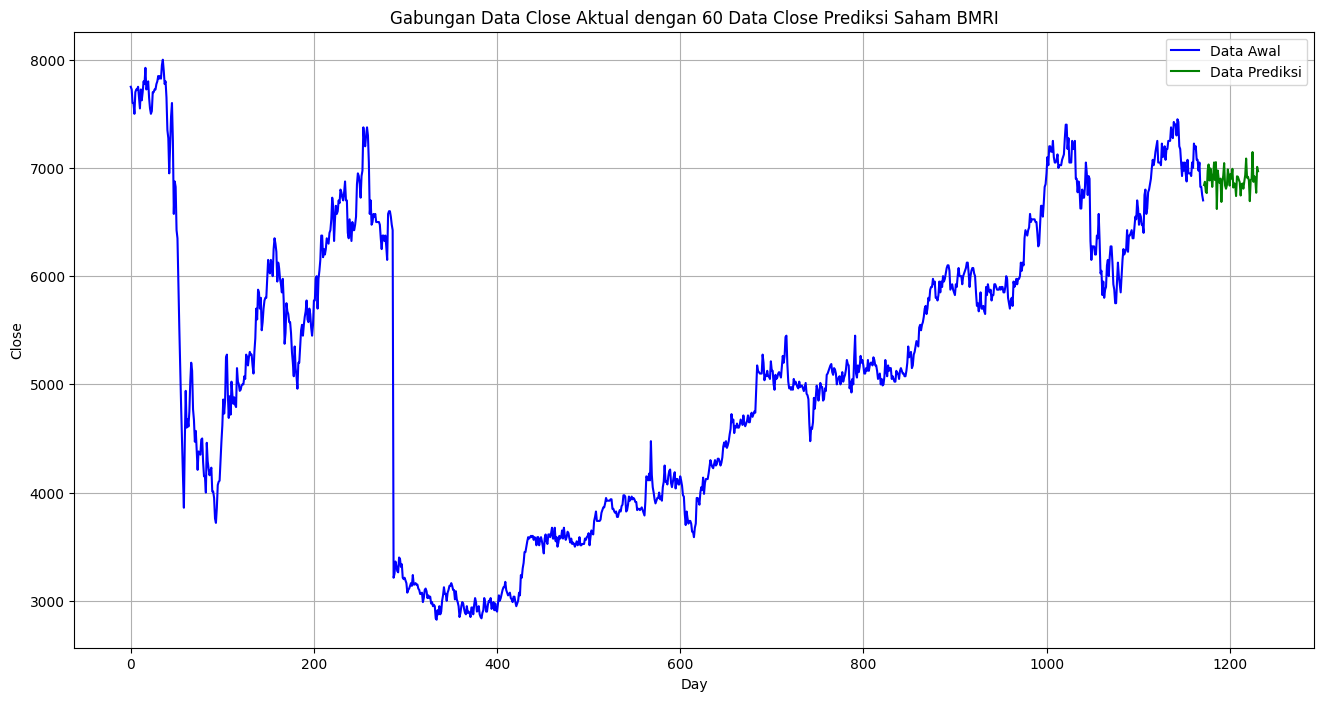

In [55]:
future_df['Day'] = range(len(df), len(df) + 60)
# Gabungan data sebelumnya dengan prediksi masa depan
combined_df = pd.concat([
    pd.DataFrame({'Day': range(len(df)), 'Close': df['Close']}),
    future_df.rename(columns={'Future Predictions': 'Close'})
], ignore_index=True)

plt.figure(figsize=(16, 8))
plt.plot(combined_df['Day'][:len(df)], combined_df['Close'][:len(df)], label='Data Awal', color='blue')
plt.plot(combined_df['Day'][len(df):], combined_df['Close'][len(df):], label='Data Prediksi', color='green') #, marker='o')
plt.title('Gabungan Data Close Aktual dengan 60 Data Close Prediksi Saham BMRI')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.grid(True)
plt.show()

In [56]:
# Simpan prediksi masa depan ke DataFrame
future_df.to_excel('future_predictions.xlsx', index=False)
print("\nPrediksi 60 Data ke Depan disimpan ke 'future_predictions.xlsx'")


Prediksi 60 Data ke Depan disimpan ke 'future_predictions.xlsx'
